# BigMart Sales Prediction Analysis - Regression

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('Train.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [65]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("catagorical columns:",cat_col,end =" ")

catagorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] 

In [66]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Checking Null Values

In [67]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [68]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [69]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df['Outlet_Size'] = imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [70]:
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

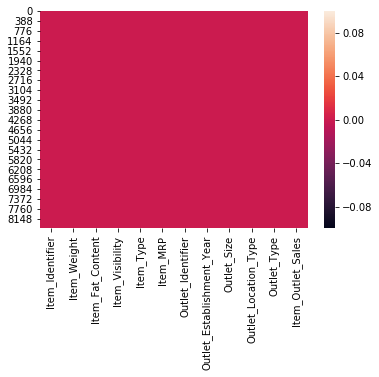

In [71]:
sns.heatmap(df.isnull())

Data Wrangling

In [72]:
df.apply(lambda x: len(x.value_counts()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [73]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [74]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [75]:
sum(df['Item_Visibility'] == 0)

0

In [76]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [77]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Exploratory Data Analysis:

0.09056145191764828
-0.8602944788067419


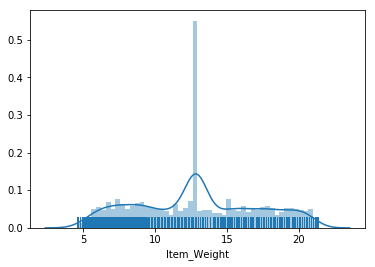

In [78]:
sns.distplot(df['Item_Weight'],rug=True,bins=50)
print(df['Item_Weight'].skew())
print(df['Item_Weight'].kurt())

1.2868767983596106
2.194146727370415


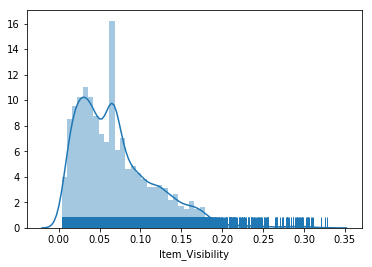

In [79]:
sns.distplot(df['Item_Visibility'],rug=True,bins=50)
print(df['Item_Visibility'].skew())
print(df['Item_Visibility'].kurt())

0.1272022683110526
-0.8897690936963571


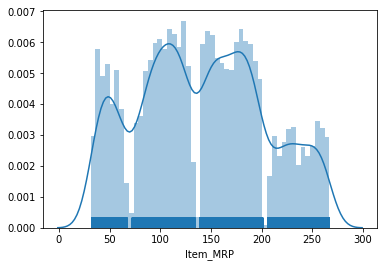

In [80]:
sns.distplot(df['Item_MRP'],rug=True,bins=50)
print(df['Item_MRP'].skew())
print(df['Item_MRP'].kurt())

1.1775306028542798
1.6158766814287264


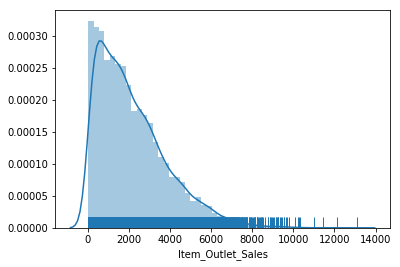

In [81]:
sns.distplot(df['Item_Outlet_Sales'],rug=True,bins=50)
print(df['Item_Outlet_Sales'].skew())
print(df['Item_Outlet_Sales'].kurt())

In [82]:
# Logarthim Transformation:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

-0.8822656923242802
0.5329195223738816


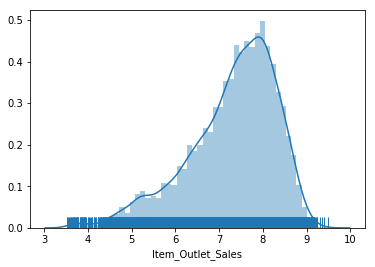

In [83]:
sns.distplot(df['Item_Outlet_Sales'],rug=True,bins=50)
print(df['Item_Outlet_Sales'].skew())
print(df['Item_Outlet_Sales'].kurt())

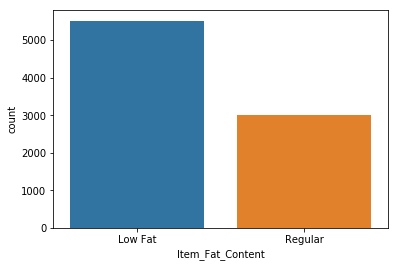

In [84]:
sns.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

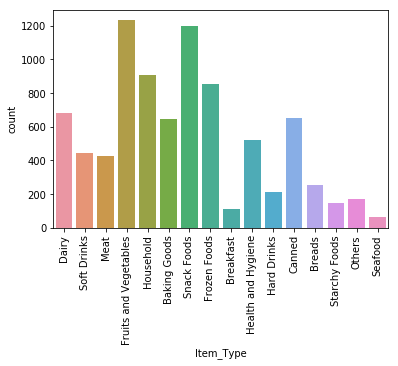

In [85]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

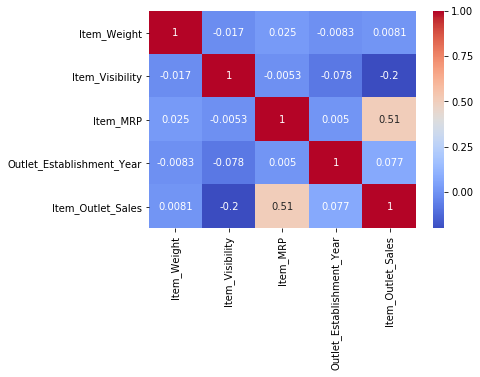

In [86]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Label Encoding

In [87]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [89]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,6.096776
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,6.597664
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,6.903451


In [90]:
df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [91]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,8.225808
1,5.92,1,0.019278,14,48.2692,1,2,2,6.096776
2,17.50,0,0.016760,10,141.6180,1,0,1,7.648868
3,19.20,1,0.066132,6,182.0950,1,2,0,6.597664
4,8.93,0,0.066132,9,53.8614,0,2,1,6.903451


Selecting Dependant and independant Variables:

In [92]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

Training and Testing Split:

In [122]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
def maxr2_score(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [123]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2_score corresponding to random state:  42 is  0.5680569719284564
r2_score corresponding to random state:  43 is  0.553211946226166
r2_score corresponding to random state:  44 is  0.5673999700115968
r2_score corresponding to random state:  45 is  0.5581053839346084
r2_score corresponding to random state:  46 is  0.5477002649479121
r2_score corresponding to random state:  47 is  0.5512526267058082
r2_score corresponding to random state:  48 is  0.5668922086571024
r2_score corresponding to random state:  49 is  0.5625316200618602
r2_score corresponding to random state:  50 is  0.5716920438202331
r2_score corresponding to random state:  51 is  0.55806436286487
r2_score corresponding to random state:  52 is  0.5616609568103996
r2_score corresponding to random state:  53 is  0.5634950662853944
r2_score corresponding to random state:  54 is  0.5743448220304024
r2_score corresponding to random state:  55 is  0.5539186850836164
r2_score corresponding to random state:  56 is  0.535041218170180

In [124]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.5604043964848208
standard deviation in r2_score for linear Regression: 0.012028996147980045


Lasso Regression

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lass = Lasso()

In [126]:
# Hyperparametre Tuning:
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [127]:
lass = GridSearchCV(estimator=lass,param_grid=param,cv=5,return_train_score=False)
lass.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [128]:
lass.best_params_

{'alpha': 0.001}

In [129]:
lass.best_score_

0.5508029839313473

In [130]:
lass = Lasso(alpha=0.001)
r_state = maxr2_score(lass,X,y)

r2_score corresponding to random state:  42 is  0.5684727736352931
r2_score corresponding to random state:  43 is  0.5534592899951518
r2_score corresponding to random state:  44 is  0.5670976928527901
r2_score corresponding to random state:  45 is  0.5572649541437149
r2_score corresponding to random state:  46 is  0.5475704203769204
r2_score corresponding to random state:  47 is  0.5515297860963845
r2_score corresponding to random state:  48 is  0.5657481900221071
r2_score corresponding to random state:  49 is  0.562757359499723
r2_score corresponding to random state:  50 is  0.5715845523682057
r2_score corresponding to random state:  51 is  0.5565246072104544
r2_score corresponding to random state:  52 is  0.5613316127912069
r2_score corresponding to random state:  53 is  0.5638022428777489
r2_score corresponding to random state:  54 is  0.5750117691098044
r2_score corresponding to random state:  55 is  0.5533991400656681
r2_score corresponding to random state:  56 is  0.5353931330420

In [131]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lass,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lass,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.5600000639915959
standard deviation in r2_score for lasso Regression: 0.011347566747641808


RandomForest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rg = RandomForestRegressor()

In [138]:
#Performing hyperparametre tuning for best parametre.
random_grid = {'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features':['auto', 'sqrt'],
               'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split':[2, 5, 10, 15, 100],
               'min_samples_leaf':[1, 2, 5, 10]}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [140]:
rg = RandomizedSearchCV(estimator= rg, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [141]:
rg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [142]:
rg.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [ ]:
rg.

In [143]:
rg = RandomForestRegressor(n_estimators=300,min_samples_split=100,min_samples_leaf=5,max_features='auto',max_depth=15)
r_state = maxr2_score(rg,X,y)

r2_score corresponding to random state:  42 is  0.7437991346785566
r2_score corresponding to random state:  43 is  0.7397922783157453
r2_score corresponding to random state:  44 is  0.7512225102940222
r2_score corresponding to random state:  45 is  0.7317969166677913
r2_score corresponding to random state:  46 is  0.718031683716001
r2_score corresponding to random state:  47 is  0.7114218612601826
r2_score corresponding to random state:  48 is  0.7494808901682468
r2_score corresponding to random state:  49 is  0.7372494833331934
r2_score corresponding to random state:  50 is  0.7307554125632537
r2_score corresponding to random state:  51 is  0.7412333237074951
r2_score corresponding to random state:  52 is  0.7384344440116585
r2_score corresponding to random state:  53 is  0.734730249224566
r2_score corresponding to random state:  54 is  0.746455880347345
r2_score corresponding to random state:  55 is  0.7347392781767341
r2_score corresponding to random state:  56 is  0.719458927860020

In [144]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Random forest Regressor:",cross_val_score(rg,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Random Forest Regressor:",cross_val_score(rg,X,y,cv=5,scoring="r2").std())

mean r2_score for Random forest Regressor: 0.7323718091428173
standard deviation in r2_score for Random Forest Regressor: 0.011308795042369344


Gradient Boosting Regressor

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [149]:
param = {'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}

In [150]:
gbr = GridSearchCV(estimator=gbr,param_grid=param,cv=5,return_train_score=False)
gbr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 100, 500, 1000]})

In [152]:
print(gbr.best_params_)
print(gbr.best_score_)

{'learning_rate': 0.01, 'n_estimators': 500}
0.7314332218638396


In [153]:
gbr = GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
r_state = maxr2_score(gbr,X,y)

r2_score corresponding to random state:  42 is  0.7432772139280998
r2_score corresponding to random state:  43 is  0.7431131866058165
r2_score corresponding to random state:  44 is  0.7517322775358164
r2_score corresponding to random state:  45 is  0.7354128775221115
r2_score corresponding to random state:  46 is  0.7217161352299133
r2_score corresponding to random state:  47 is  0.718430492974244
r2_score corresponding to random state:  48 is  0.7510739005135212
r2_score corresponding to random state:  49 is  0.7401464535539104
r2_score corresponding to random state:  50 is  0.7322949929189906
r2_score corresponding to random state:  51 is  0.7417242549641226
r2_score corresponding to random state:  52 is  0.7398153112799173
r2_score corresponding to random state:  53 is  0.7399109248213931
r2_score corresponding to random state:  54 is  0.7501450381618846
r2_score corresponding to random state:  55 is  0.7387712558712598
r2_score corresponding to random state:  56 is  0.7226742005369

In [154]:
print("mean r2_score for GradientBoosting Regressor:",cross_val_score(gbr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for GradientBoosting Regressor:",cross_val_score(gbr,X,y,cv=5,scoring="r2").std())

mean r2_score for GradientBoosting Regressor: 0.7357614111427421
standard deviation in r2_score for GradientBoosting Regressor: 0.011394415729052214
